In [2]:
from analysis import TemperatureDataAnalyzer
%matplotlib inline
file_path = "klementinum.xlsx"
analyzer = TemperatureDataAnalyzer(file_path)
analyzer.read_data()

                rok         měsíc           den         T-AVG           TMA  \
count  90580.000000  90580.000000  90580.000000  90580.000000  90580.000000   
mean    1898.500729      6.523029     15.729344      9.764286     13.266869   
std       71.591284      3.448695      8.800017      8.333259      9.365293   
min     1775.000000      1.000000      1.000000    -24.800000    -21.500000   
25%     1836.750000      4.000000      8.000000      3.300000      5.600000   
50%     1898.500000      7.000000     16.000000      9.900000     13.500000   
75%     1960.250000     10.000000     23.000000     16.700000     21.000000   
max     2022.000000     12.000000     31.000000     31.900000     37.800000   

                TMI           SRA  
count  90580.000000  79837.000000  
mean       6.277493      1.292845  
std        7.557287      3.636872  
min      -27.600000      0.000000  
25%        1.000000      0.000000  
50%        6.400000      0.000000  
75%       12.600000      0.800000  


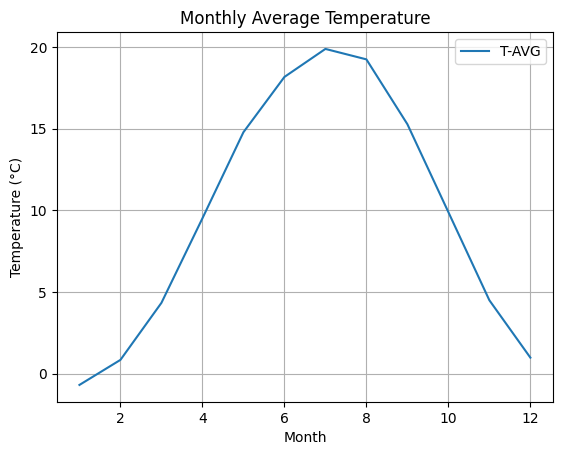

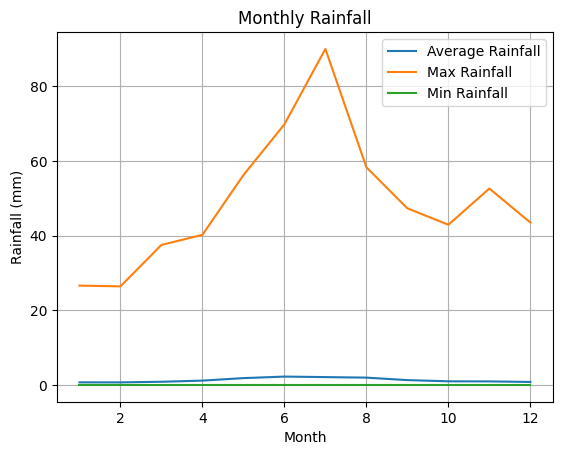

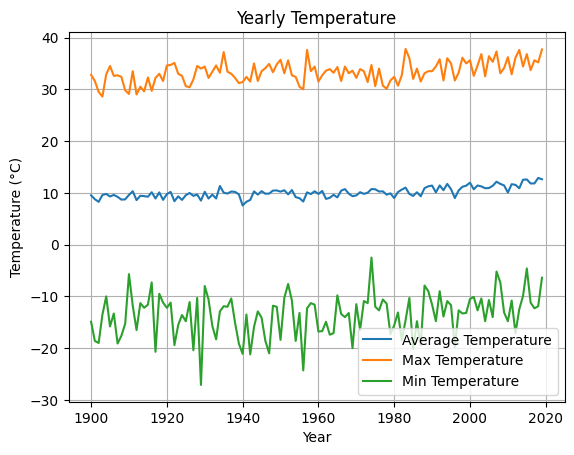

In [3]:
analyzer.summary_statistics()
print(analyzer.get_data('rok', 'T-AVG').mean())
print(analyzer.get_data('rok', 'TMA').max())
print(analyzer.get_data('rok', 'TMI').min())
print(analyzer.get_data('rok', 'SRA').mean())
analyzer.plot_monthly_avg_temperature()
analyzer.plot_monthly_all_rainfall()
analyzer.plot_yearly_all_temperature(1900, 2020)